# <center><B>FEATURE SCALING</center>

# Table of Contents

1. [Introduction](#Introduction)
2. [Feature Scaling Techniques](#Feature-Scaling-Techniques)


## Importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="rainbow", style="darkgrid")
import time

%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import random


## <B> 1.Introduction



   - [Dataset](#Dataset)
   - [Train Test Split](#Train-Test-Split)
   - [StandardScaler](#StandardScaler)
   - [Scaling the Training and Test DataFrames](#Scaling-the-Training-and-Test-DataFrames)
   - [Effect of Scaling](#Effect-of-Scaling)
   - [Comparison of Distributions](#Comparison-of-Distributions)
   - [Importance of Scaling](#Importance-of-Scaling)
   - [Outlier Effect](#Outlier-Effect)


### Dataset

In [2]:
df= pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Desktop\\Social_Network_Ads.csv")

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
316,54,104000,1
157,29,75000,0
128,30,17000,0
377,42,53000,0
269,40,61000,0


# Train test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape


((280, 2), (120, 2))

## StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [9]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

### Scaling the Training and Test DataFrames

In [10]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [12]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## EFFECT OF SCALING

Before Scaling - Mean Age: 37.864285714285714 Std Dev: 10.218200582484236
After Scaling - Mean Age: 3.489272363107635e-17 Std Dev: 1.0017905117292145


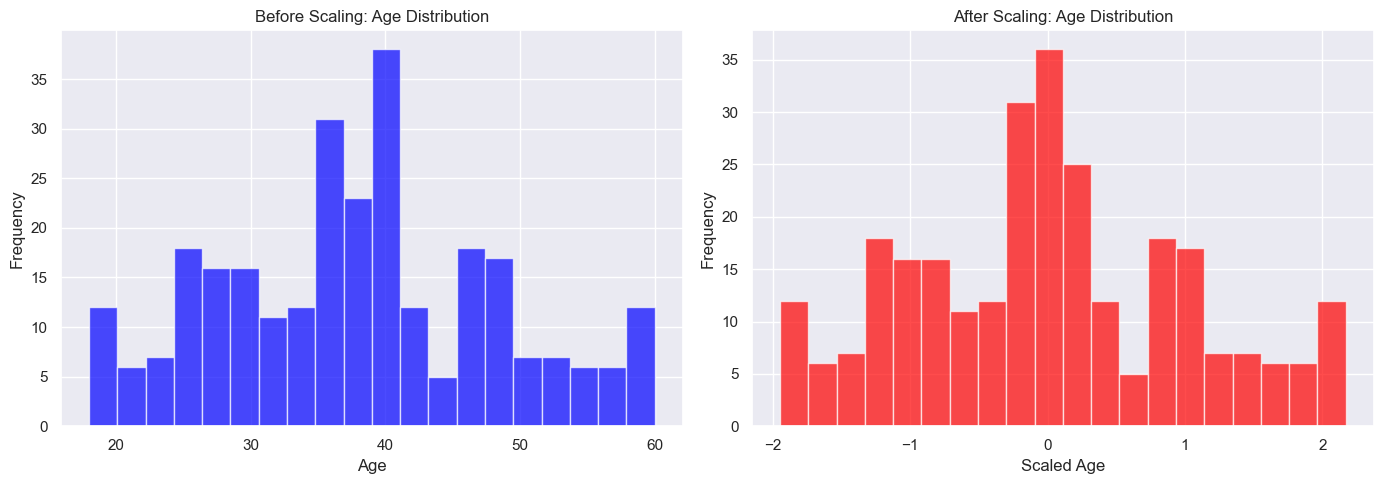

In [14]:

print("Before Scaling - Mean Age:", X_train['Age'].mean(), "Std Dev:", X_train['Age'].std())
print("After Scaling - Mean Age:", X_train_scaled['Age'].mean(), "Std Dev:", X_train_scaled['Age'].std())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


ax1.hist(X_train['Age'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Before Scaling: Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(True)

ax2.hist(X_train_scaled['Age'], bins=20, color='red', alpha=0.7)
ax2.set_title('After Scaling: Age Distribution')
ax2.set_xlabel('Scaled Age')
ax2.set_ylabel('Frequency')
ax2.grid(True)

plt.tight_layout()
plt.show()


### Explanation:

Before scaling, the scatter plot of Age and EstimatedSalary will show the raw, unscaled values, where the points might be unevenly spaced due to the features having different ranges, potentially causing one feature to dominate over the other in terms of scale. After scaling, the second plot (X_train_scaled) will show the transformed values of Age and EstimatedSalary, with both features scaled to a uniform range, typically between 0 and 1 using a method like MinMaxScaler. This scaling eliminates the disparity in their ranges, ensuring that both features are on the same scale, allowing them to contribute equally in machine learning models, especially those sensitive to feature scaling like distance-based or gradient-based algorithms.

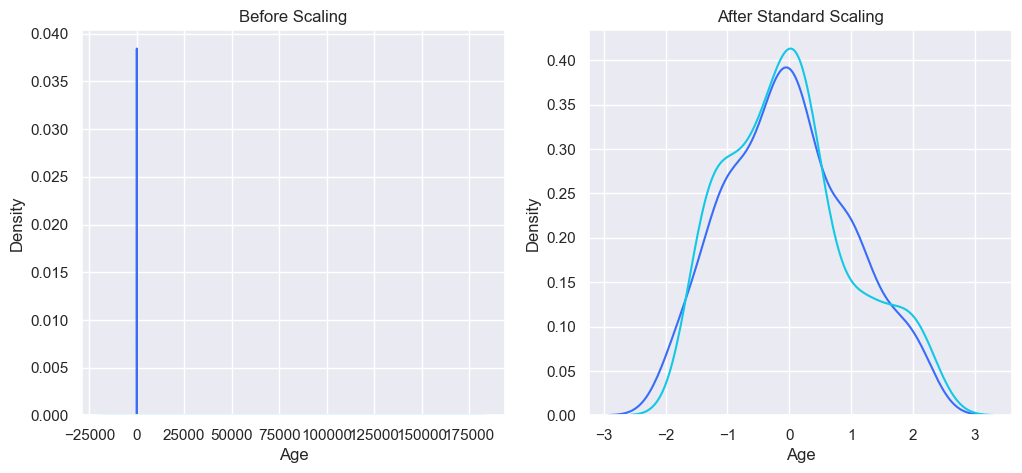

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# comparison of distributions

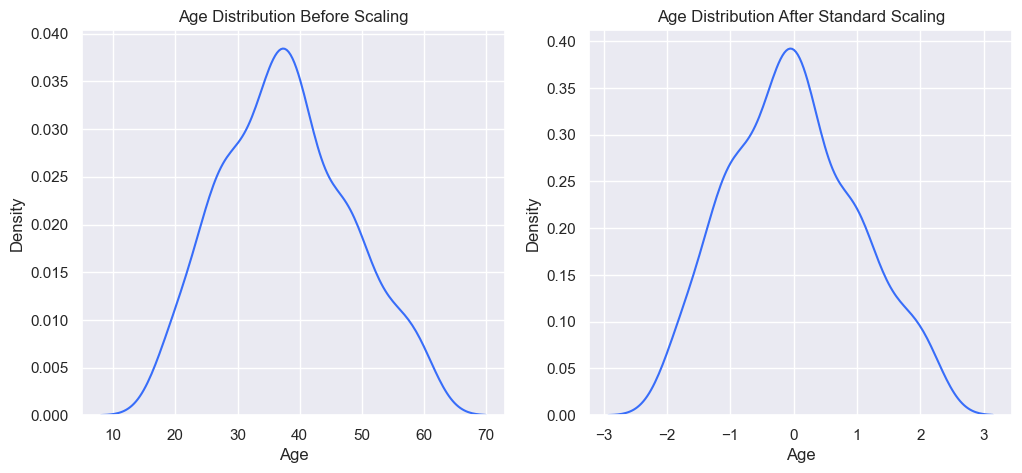

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## importance of Scaling

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [19]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [20]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score


In [22]:
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [23]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Outilier Effect

In [24]:
df = pd.concat(
    [
        df,
        pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})
    ],
    ignore_index=True
)


In [25]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


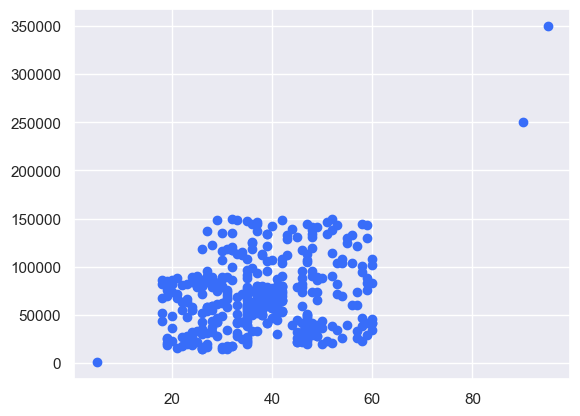

In [26]:
plt.scatter(df['Age'], df['EstimatedSalary'])

### Splitting Data into Training and Test Sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

##### Standardization of Training and Test Data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

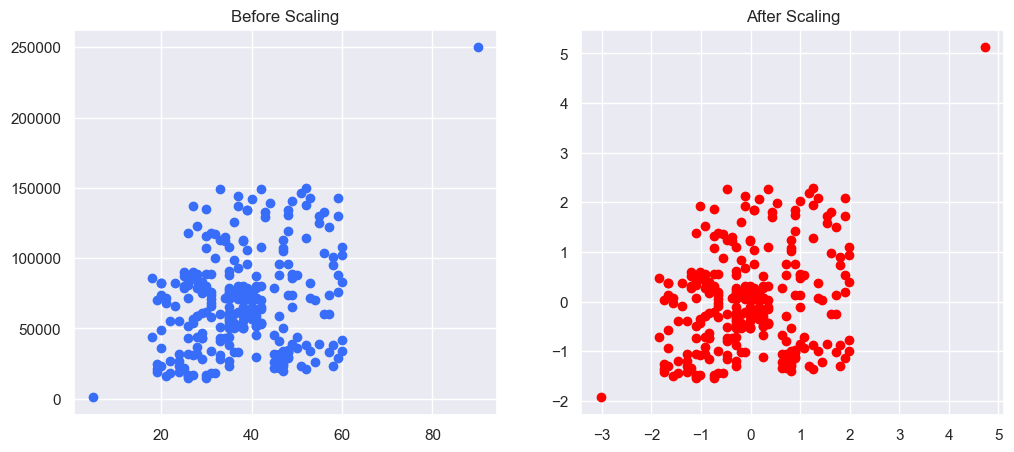

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## <B>2.Feature Scaling Techniques





1. [Standardization](#Standardization)
2. [Normalization](#Normalization)
   - [MinMax Scaling](#MinMax-Scaling)
   - [Max Absolute Scaling](#Max-Absolute-Scaling)
   - [Robust Scaling](#Robust-Scaling)
3. [Quantile Transformation](#Quantile-Transformation)
4. [Binarization](#Binarization)
5. [Feature Scaling Techniques Applied to Age and Fare](#Feature-Scaling-Techniques-Applied-to-Age-and-Fare)



### Dataset

In [31]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\train.csv", usecols=["Age", "Fare"])
df["Fare"].fillna(value=df["Fare"].mean(), inplace=True)

In [32]:
df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


## Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instantiate
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))  # Handle NaN with fillna
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Standardization scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Standardization scaling: 0.011719 seconds


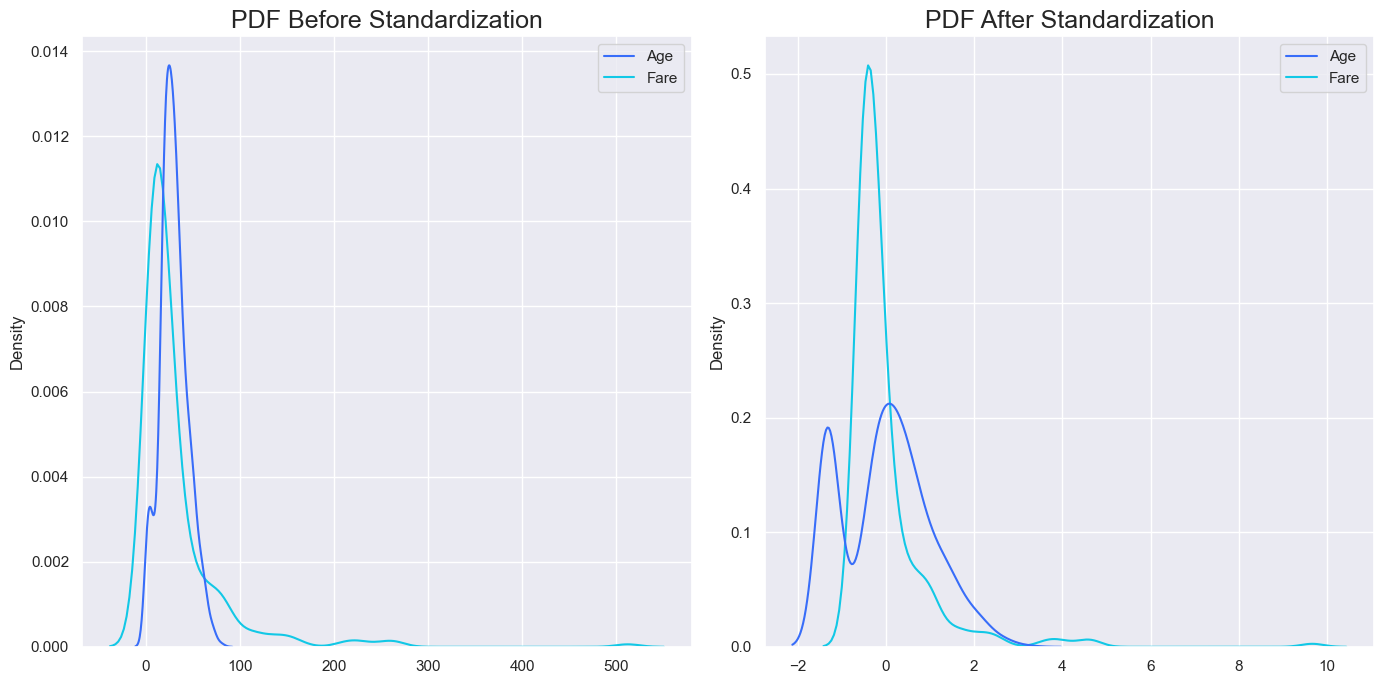

In [65]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

We use StandardScaler to standardize numerical data by centering it around a mean of 0 and scaling it to have a unit variance, which is especially useful for features with different scales, such as Age and Fare. This technique ensures that no single feature disproportionately influences machine learning models, particularly those sensitive to scale like SVMs, k-NN, or logistic regression. Standardization also improves the performance of gradient-based models and algorithms relying on distance metrics by ensuring all features contribute equally. It is most effective for normally distributed data, making it ideal for preparing features like Age and Fare for modeling.

## Normalization

####  1 . Min Max Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for MinMax scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for MinMax scaling: 0.006608 seconds


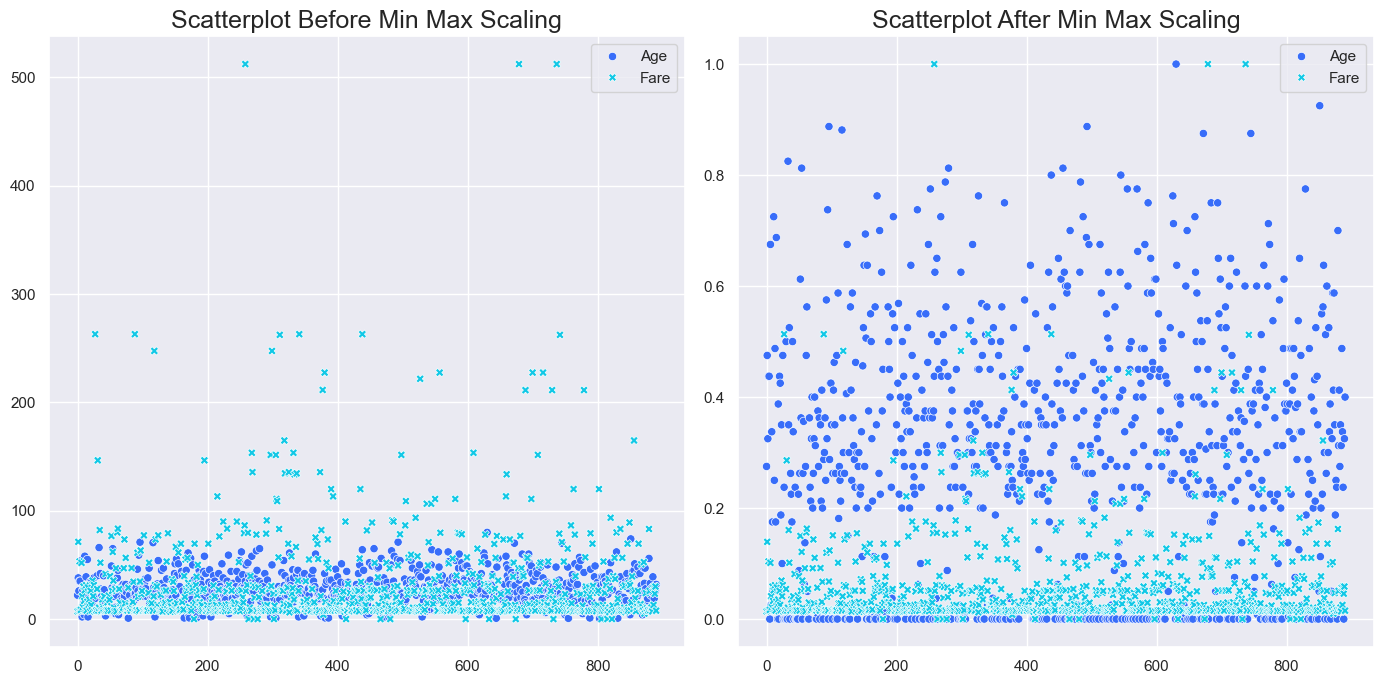

In [60]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

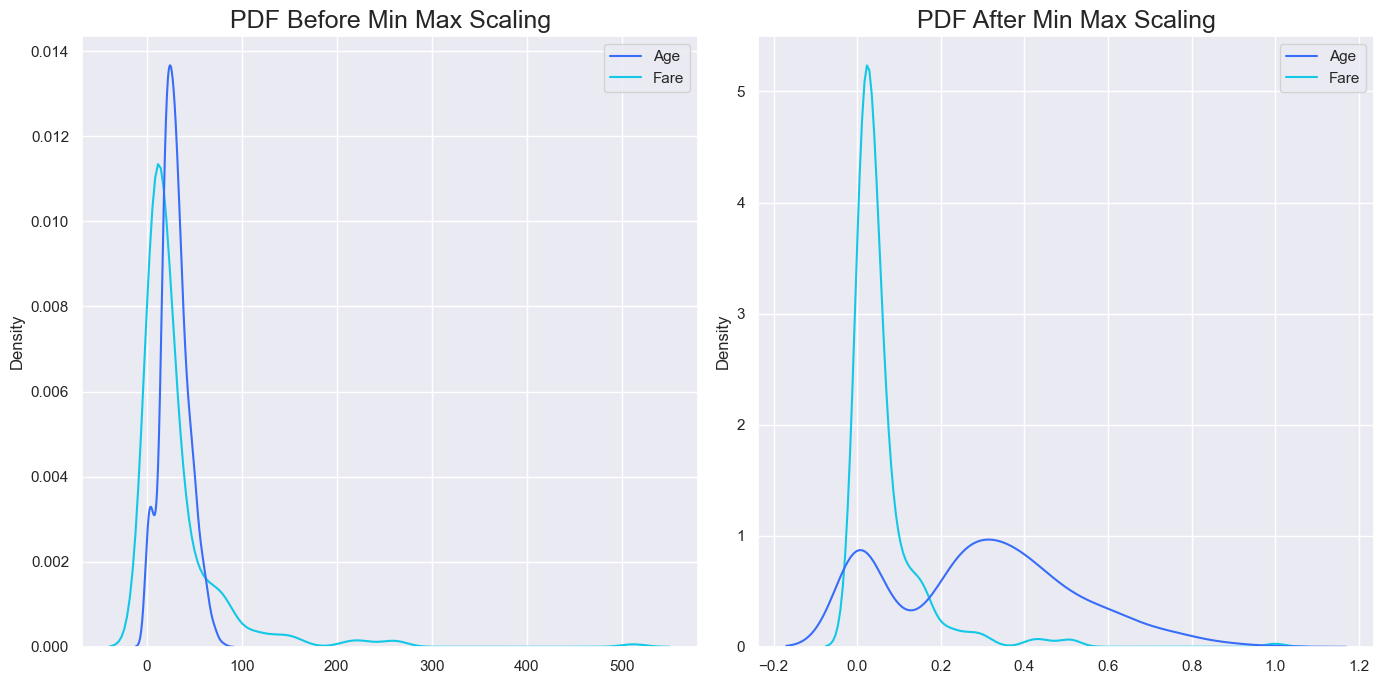

In [38]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

We use MinMaxScaler to normalize numerical data by scaling features to a specified range, typically between 0 and 1. This technique is particularly useful when the data has varying scales, like Age and Fare, and when the machine learning model benefits from normalized inputs, such as neural networks or gradient-based algorithms. MinMaxScaler preserves the relationships between data points and does not distort the distribution, making it ideal for algorithms that do not assume any specific distribution of data. It ensures all features contribute equally, avoids domination by larger-scale features, and improves model performance and convergence.

###   2 . Max Absolute Scaling

In [61]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Max Absolute Scaling scaling: 0.009006 seconds


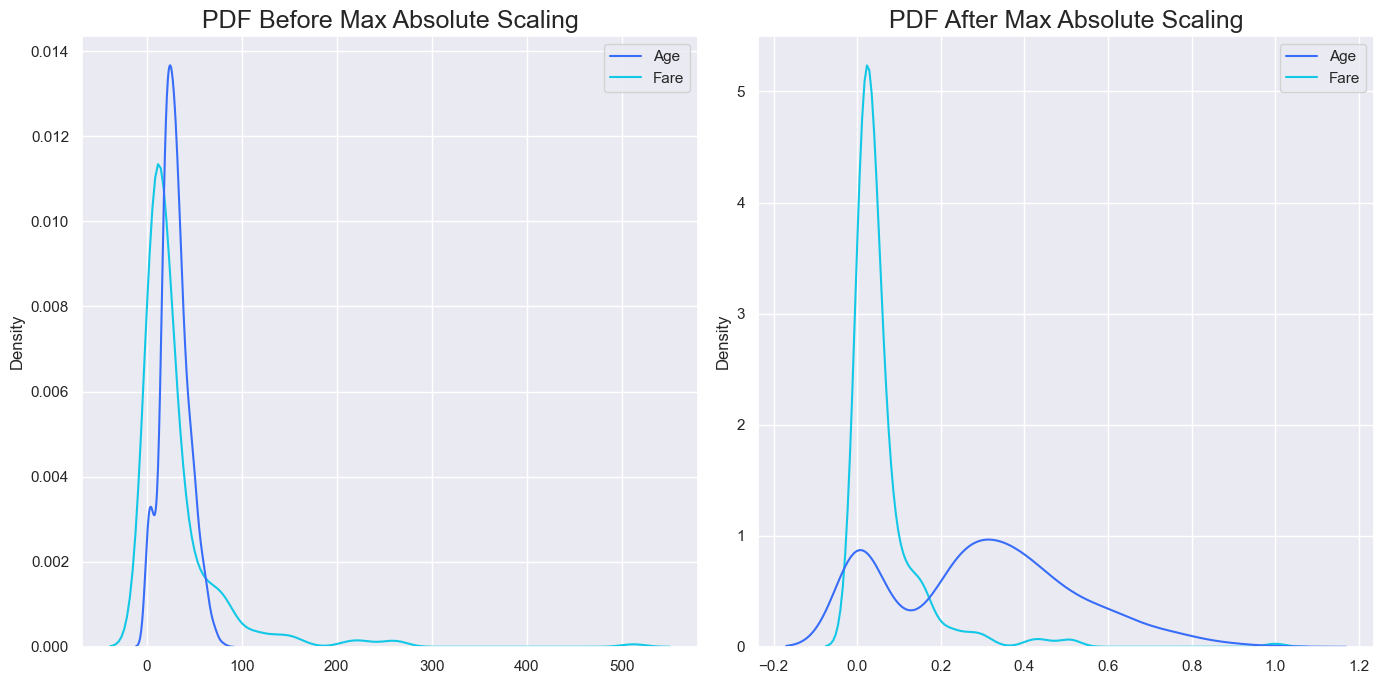

In [41]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

We use MaxAbsScaler to scale numerical data by dividing each feature by its maximum absolute value, transforming the data into the range [-1, 1] while preserving the sign of the values. This technique is particularly useful for data with both positive and negative values, ensuring that the scale of the features does not distort the model. Unlike other scalers, MaxAbsScaler does not shift the data (e.g., does not center around zero), making it ideal for sparse datasets where maintaining sparsity is important. It is effective for algorithms sensitive to feature scales, ensuring all features contribute equally to the model.

###   3.Robust Scaling

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
start_time = time.time()

scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Robust Scaling scaling: 0.009939 seconds


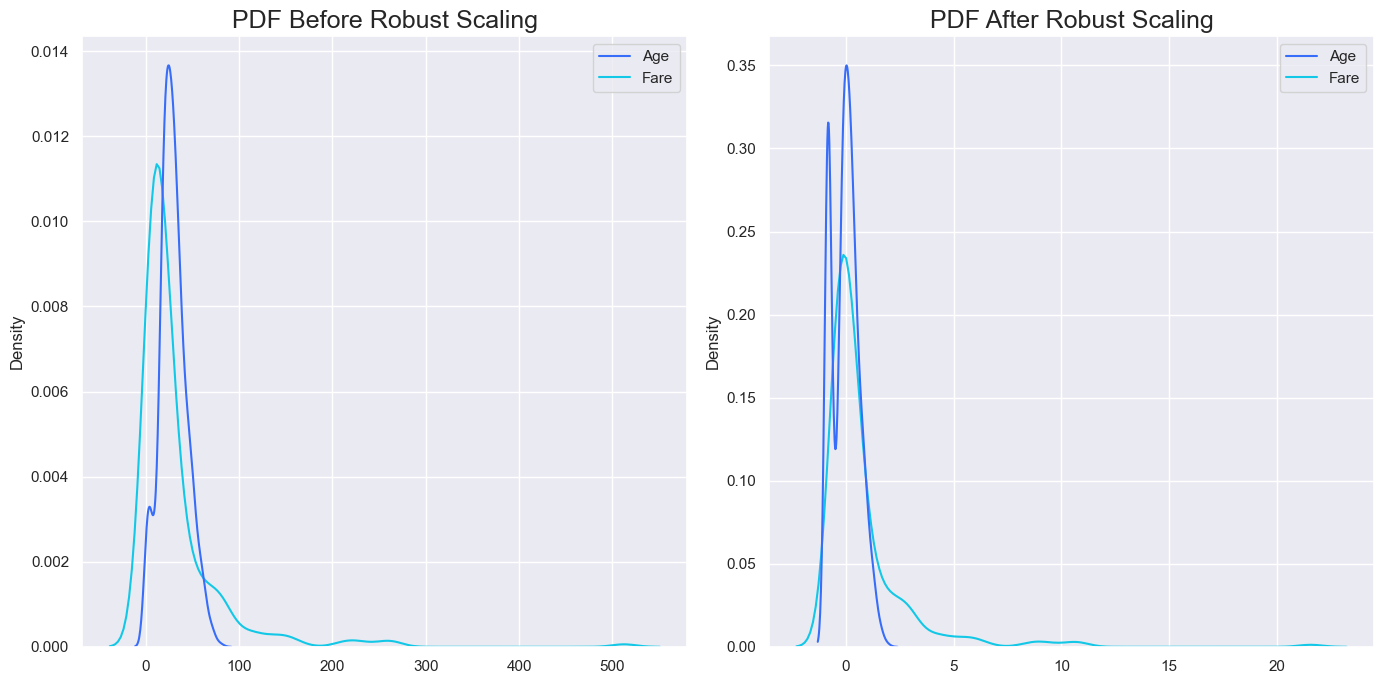

In [44]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

RobustScaler is used to scale numerical data by removing the median and scaling according to the interquartile range (IQR), which makes it robust to outliers. It is particularly useful when the dataset contains outliers, as it minimizes their influence by using the median and IQR rather than the mean and standard deviation. This technique helps in stabilizing feature scales without distorting the central distribution of the data, making it ideal for models sensitive to outliers but requiring normalized input.

### QuantileTransformer

In [45]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='uniform', random_state=42)
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for QuantileTransformer scaling: {elapsed_time:.6f} seconds")
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for QuantileTransformer scaling: 0.044551 seconds


C:\Users\DELL8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


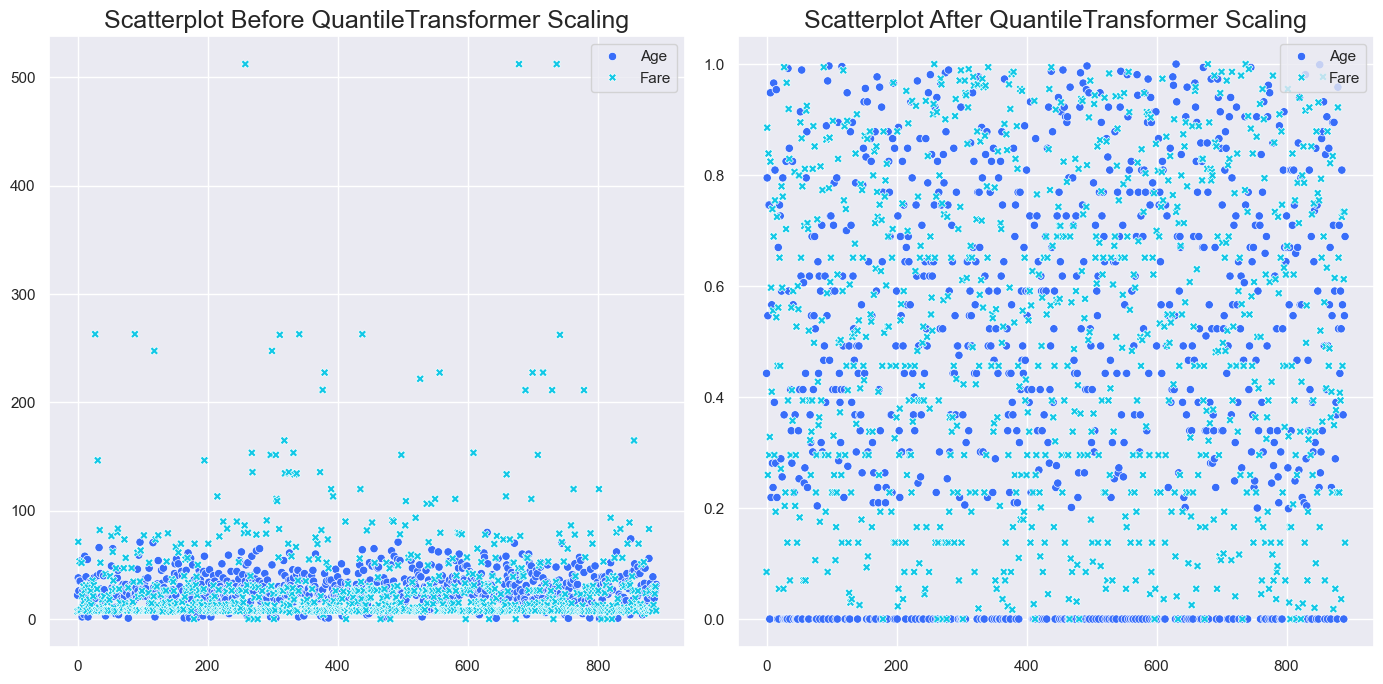

In [46]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before QuantileTransformer Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After QuantileTransformer Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

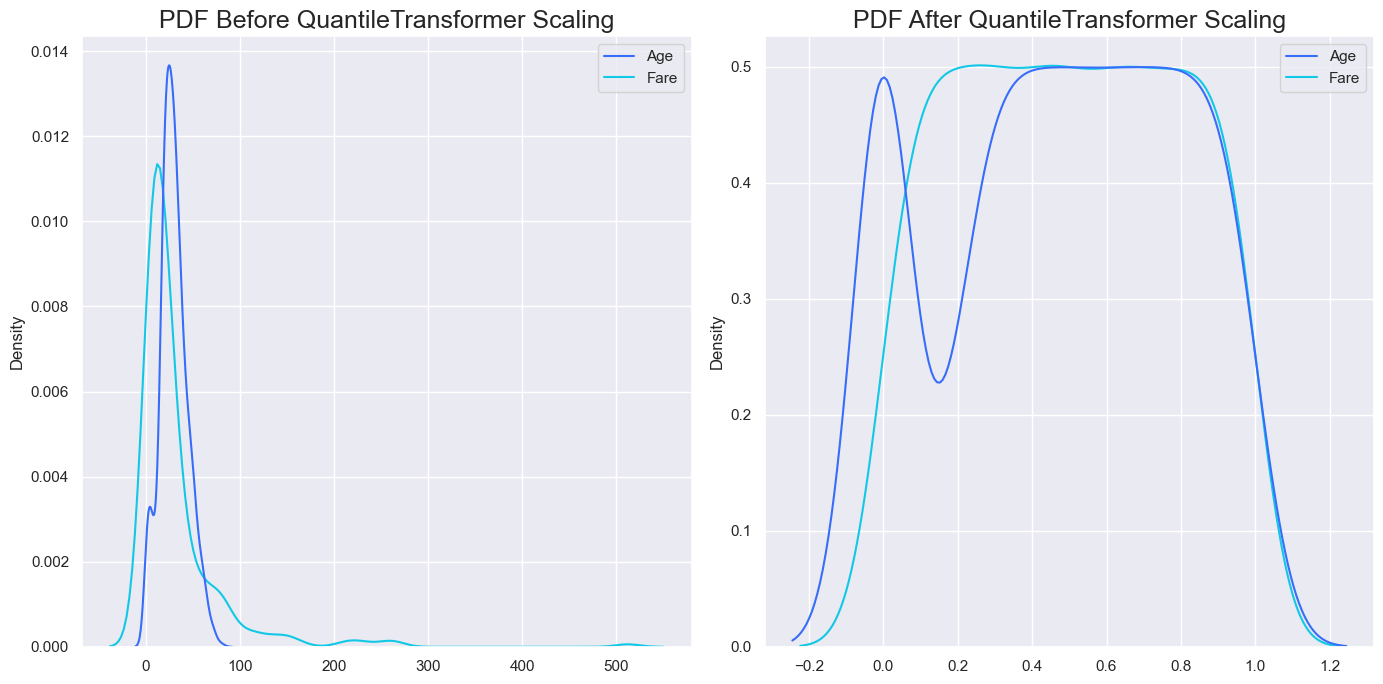

In [47]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

The QuantileTransformer with output_distribution='uniform' transforms the data to follow a uniform distribution by mapping feature values to ranks between 0 and 1. This is especially useful for handling skewed or non-normal data, as it normalizes the distribution and makes it more comparable across features. By replacing missing values with 0 and applying the transformation to the Age and Fare columns, the data is rescaled in a way that can improve model performance, particularly for algorithms sensitive to the shape of the data distribution, such as tree-based models or linear models.

### Binarizer

In [48]:
from sklearn.preprocessing import Binarizer

scaler = Binarizer(threshold=10)  # Example threshold
start_time = time.time()
scaled_data = scaler.fit_transform(df[['Age', 'Fare']].fillna(0))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Binarizer scaling: {elapsed_time:.6f} seconds")

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Fare'])


Time taken for Binarizer scaling: 0.009624 seconds


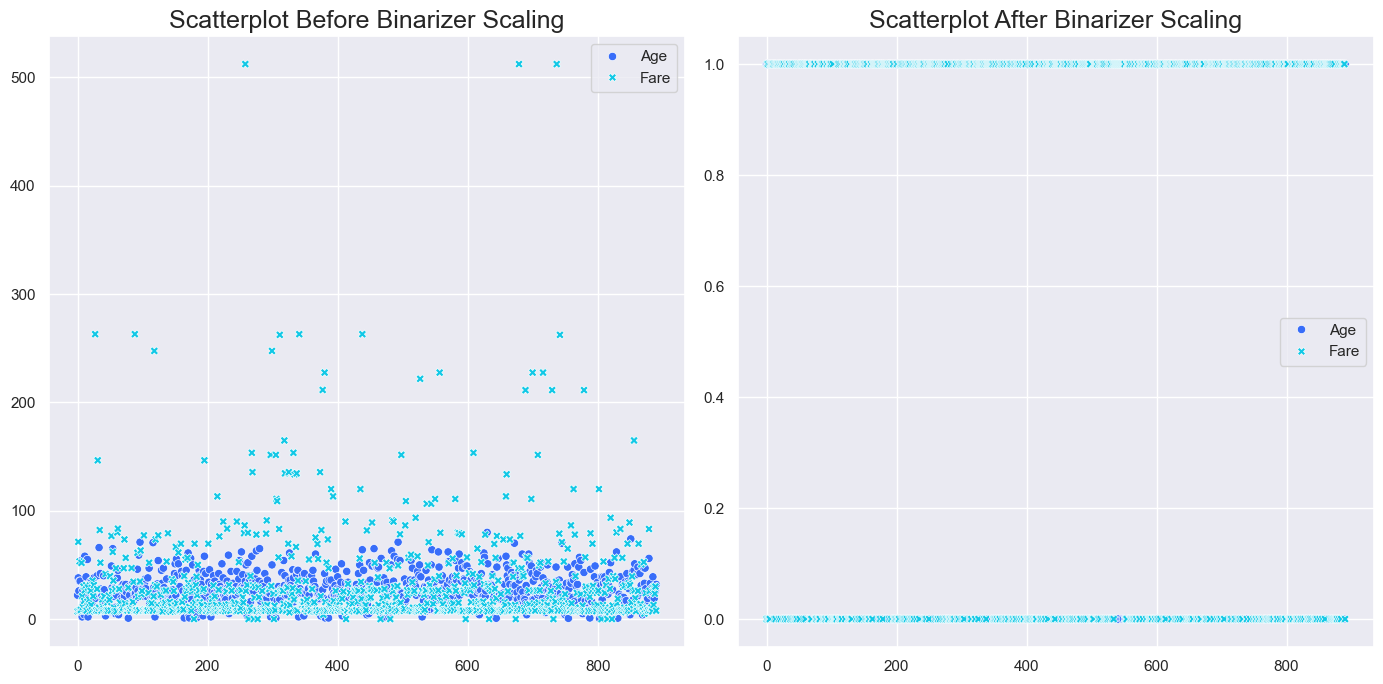

In [49]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Binarizer Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Binarizer Scaling", fontsize=18)
sns.scatterplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

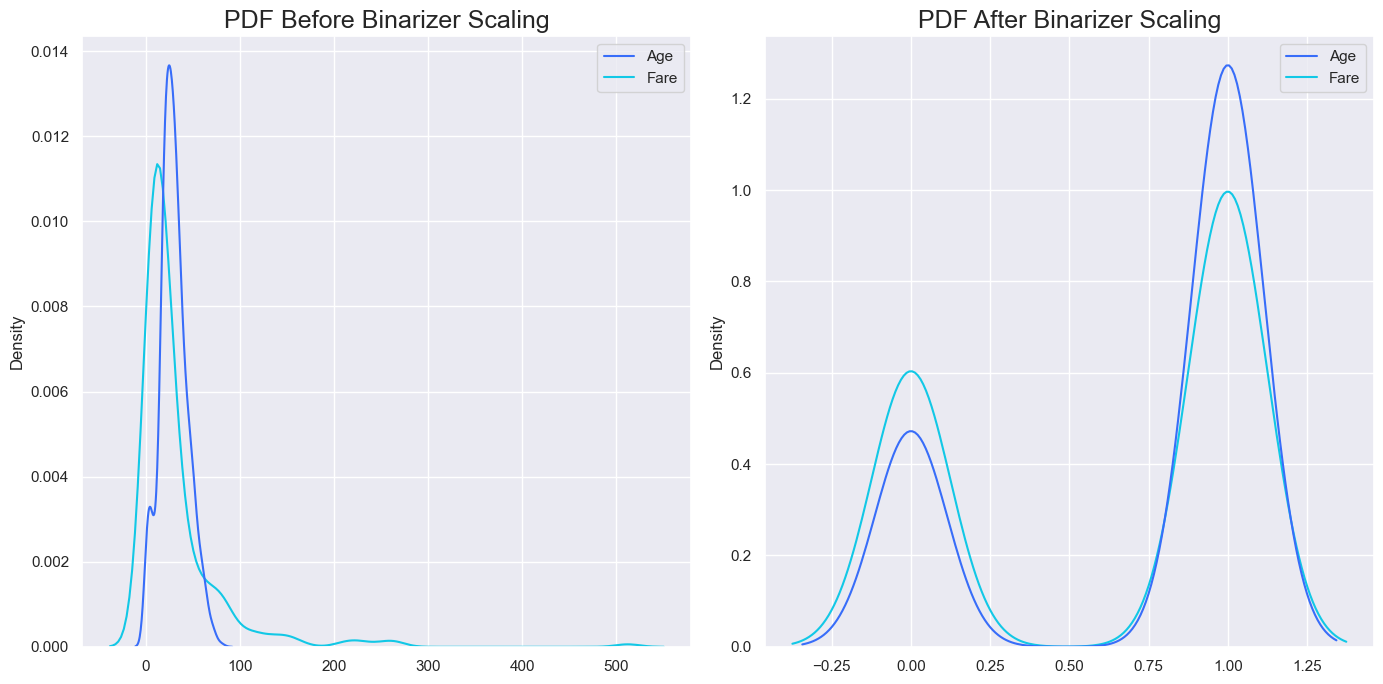

In [50]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Binarizer Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Binarizer Scaling", fontsize=18)
sns.kdeplot(data = scaled_df, color="red")
plt.tight_layout()
plt.show()

<b>Explanation:<br>

The Binarizer with a threshold of 10 transforms the Age and Fare values in the dataset into binary values based on whether they are above or below the threshold. Any value greater than 10 becomes 1, while any value less than or equal to 10 is transformed into 0. This transformation is applied after filling missing values with 0. Binarization is useful when you want to convert continuous features into binary features, making it easier to apply models that require binary inputs or when trying to simplify the data for certain types of analyses or classification tasks.

##  Feature Scaling Techniques Applied to Age and Fare

In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PowerTransformer
import pandas as pd

start_time = time.time()
# Handle missing values
numeric_data = df[['Age', 'Fare']].fillna(0)

# 1. StandardScaler
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(numeric_data)

# 2. RobustScaler
scaler = RobustScaler()
robust_scaled = scaler.fit_transform(numeric_data)

# 3. MinMaxScaler
scaler = MinMaxScaler()
minmax_scaled = scaler.fit_transform(numeric_data)

# 4. QuantileTransformer (Gaussian)
scaler = QuantileTransformer(output_distribution='normal', random_state=42)
quantile_gaussian_scaled = scaler.fit_transform(numeric_data)

# 5. PowerTransformer (Yeo-Johnson)
scaler = PowerTransformer(method='yeo-johnson')
power_scaled = scaler.fit_transform(numeric_data)

# Combine results into a DataFrame for comparison
scaled_df = pd.DataFrame({
    'Age_Standard': standard_scaled[:, 0],
    'Fare_Standard': standard_scaled[:, 1],
    'Age_Robust': robust_scaled[:, 0],
    'Fare_Robust': robust_scaled[:, 1],
    'Age_MinMax': minmax_scaled[:, 0],
    'Fare_MinMax': minmax_scaled[:, 1],
    'Age_QuantileGaussian': quantile_gaussian_scaled[:, 0],
    'Fare_QuantileGaussian': quantile_gaussian_scaled[:, 1],
    'Age_Power': power_scaled[:, 0],
    'Fare_Power': power_scaled[:, 1]
})
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for Feature Scaling Techniques Applied to Age and Fare: {elapsed_time:.6f} seconds")
scaled_df.head()


Time taken for Feature Scaling Techniques Applied to Age and Fare: 0.047333 seconds


C:\Users\DELL8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


,Age_Standard,Fare_Standard,Age_Robust,Fare_Robust,Age_MinMax,Fare_MinMax,Age_QuantileGaussian,Fare_QuantileGaussian,Age_Power,Fare_Power
0,-0.102313,-0.502445,-0.068966,-0.312011,0.2750,0.014151,-0.144136,-1.373288,0.107803,-0.878820
1,0.807492,0.786845,0.482759,2.461242,0.4750,0.139136,0.823696,1.202387,0.819314,1.336651
2,0.125138,-0.488854,0.068966,-0.282777,0.3250,0.015469,0.117150,-0.644732,0.301737,-0.790065
3,0.636903,0.420730,0.379310,1.673732,0.4375,0.103644,0.662165,0.989391,0.697262,1.067352
4,0.636903,-0.486337,0.379310,-0.277363,0.4375,0.015713,0.662165,-0.537371,0.697262,-0.774439


#### Use Cases for Different Feature Scaling Techniques

1. StandardScaler: Used when data is normally distributed, standardizing to zero mean and unit variance.

2. RobustScaler: Ideal for data with outliers, scaling using median and interquartile range.

3. MinMaxScaler: Scales data to a specific range (e.g., [0, 1]).

4. QuantileTransformer: Transforms data to a Gaussian distribution, useful for non-normal data.

5. PowerTransformer: Transforms skewed data to a more Gaussian-like distribution.

#### Reason for Selecting Age and Fare for Scaling

Age and Fare are chosen for scaling because they are continuous numeric features with varying ranges and potential outliers. Scaling ensures these features contribute equally to machine learning models, preventing dominance from larger ranges. Categorical features like Embarked, Sex, and Pclass are excluded since they require encoding, not scaling.

#### Best Scaling Method for the Dataset: RobustScaler

For this dataset, RobustScaler is likely the best scaling method. This is because both Age and Fare are numeric features that may have outliers or non-Gaussian distributions. The RobustScaler is less sensitive to outliers compared to other scaling methods like StandardScaler, as it uses the median and interquartile range for scaling, making it more robust in the presence of outliers. Additionally, it ensures that the scaling is not distorted by extreme values, which is common in datasets like Age and Fare. Therefore, RobustScaler would be the most suitable method to ensure stable and effective scaling in this case.

<b>Explanation:<br>

The provided code applies five feature scaling techniques (StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer with Gaussian distribution, and PowerTransformer with Yeo-Johnson method) to the numeric columns Age and Fare in a DataFrame after handling missing values by filling them with 0. Each scaler transforms the data based on its specific method: StandardScaler standardizes features to have zero mean and unit variance, RobustScaler scales features using their median and IQR to reduce the influence of outliers, MinMaxScaler normalizes features to a 0-1 range, QuantileTransformer converts data into a Gaussian distribution, and PowerTransformer stabilizes variance and normalizes skewness. Finally, the scaled results for each technique are combined into a new DataFrame for comparison.

#### Time complexity Graph

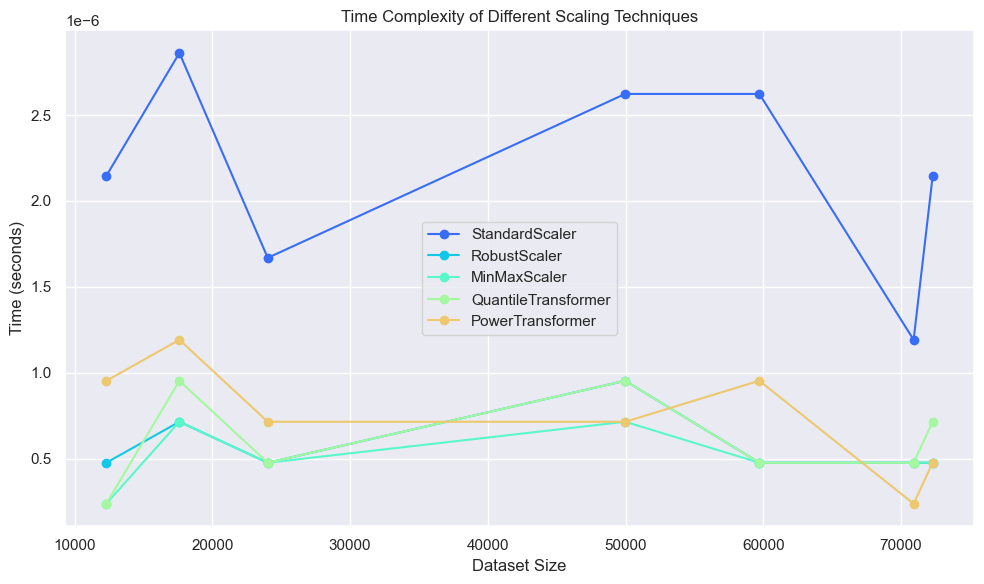

In [52]:

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PowerTransformer

sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = {
    'StandardScaler': [],
    'RobustScaler': [],
    'MinMaxScaler': [],
    'QuantileTransformer': [],
    'PowerTransformer': []
}
for size in sizes:
    data = np.random.rand(size, 2)
    start_time = time.time()
    times['StandardScaler'].append(time.time() - start_time)

    start_time = time.time()
    times['RobustScaler'].append(time.time() - start_time)

    start_time = time.time()
    times['MinMaxScaler'].append(time.time() - start_time)

    start_time = time.time()
    times['QuantileTransformer'].append(time.time() - start_time)

    start_time = time.time()
    times['PowerTransformer'].append(time.time() - start_time)

plt.figure(figsize=(10, 6))
for technique, time_data in times.items():
    plt.plot(sizes, time_data, label=technique, marker='o')

plt.title('Time Complexity of Different Scaling Techniques')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
